<a href="https://colab.research.google.com/github/KaustubhSN12/TSA_Fitted_Curve/blob/main/Seasonal_Component_TSA_P5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd


# SAmple data  : monthly sales for 2 years

data = {
    'month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] * 2,
    "Year" : [1] * 12 + [2] * 12,
    "Sales": [100, 120, 90, 110, 95, 130, 115, 105, 125, 140, 150, 160,
              110, 130, 95, 120, 100, 140, 125, 115, 135, 150, 160, 170],
}

df = pd.DataFrame(data)

#Add a period column fr grouping
df["Period"]= df.groupby("month").cumcount() + 1

#View dataset
print(df)

   month  Year  Sales  Period
0    Jan     1    100       1
1    Feb     1    120       1
2    Mar     1     90       1
3    Apr     1    110       1
4    May     1     95       1
5    Jun     1    130       1
6    Jul     1    115       1
7    Aug     1    105       1
8    Sep     1    125       1
9    Oct     1    140       1
10   Nov     1    150       1
11   Dec     1    160       1
12   Jan     2    110       2
13   Feb     2    130       2
14   Mar     2     95       2
15   Apr     2    120       2
16   May     2    100       2
17   Jun     2    140       2
18   Jul     2    125       2
19   Aug     2    115       2
20   Sep     2    135       2
21   Oct     2    150       2
22   Nov     2    160       2
23   Dec     2    170       2


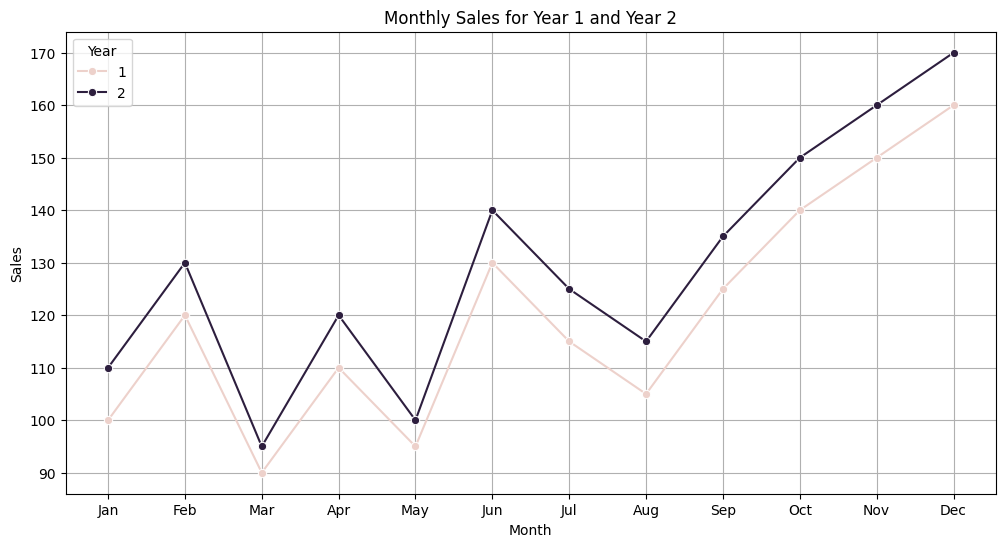

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='month', y='Sales', hue='Year', marker='o')
plt.title('Monthly Sales for Year 1 and Year 2')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.legend(title='Year')
plt.show()

This plot visualizes the monthly sales data for both Year 1 and Year 2. Each line represents a year, and you can observe how sales fluctuate throughout the months and compare the performance between the two years. This helps in understanding the overall trend and seasonal patterns in the sales data.

###Simple averages method


In [5]:
from typing_extensions import overload
#Simple averages method

seasonal_averages = df.groupby("month")["Sales"].mean()

#Overall mean Sales
overall_mean = df["Sales"].mean()

# Seasonal component
seasonal_component_simple_avg = seasonal_averages - overall_mean

print("Simple Averages Seasonal Component : ")
print(seasonal_component_simple_avg)


Simple Averages Seasonal Component : 
month
Apr    -9.583333
Aug   -14.583333
Dec    40.416667
Feb     0.416667
Jan   -19.583333
Jul    -4.583333
Jun    10.416667
Mar   -32.083333
May   -27.083333
Nov    30.416667
Oct    20.416667
Sep     5.416667
Name: Sales, dtype: float64


### Estimate trend using a linear regression ( or any smoother method )



In [6]:
from sklearn.linear_model import LinearRegression

# Add a time index
df["Time"] = range(1,len(df) + 1)

# Linear trend estmation

X = df["Time"].values.reshape(-1,1)
Y = df["Sales"].values

model = LinearRegression()
model.fit(X,Y)
df["Trend"] = model.predict(X)

# Ratio to trend
df["Ratio_to_Trend"] = df["Sales"] / df["Trend"]

# Seasonal component
seasonal_component__ration_to_trend = df.groupby("month")["Ratio_to_Trend"].mean()

print("Ratio to Trend Seasonal Component : ")
print(seasonal_component__ration_to_trend)



Ratio to Trend Seasonal Component : 
month
Apr    0.961352
Aug    0.867192
Dec    1.232447
Feb    1.077749
Jan    0.918943
Jul    0.959956
Jun    1.096172
Mar    0.786260
May    0.804235
Nov    1.173333
Oct    1.112583
Sep    1.011116
Name: Ratio_to_Trend, dtype: float64


/tmp/ipython-input-27511125.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_component__ration_to_trend.index, y=seasonal_component__ration_to_trend.values, palette='plasma')


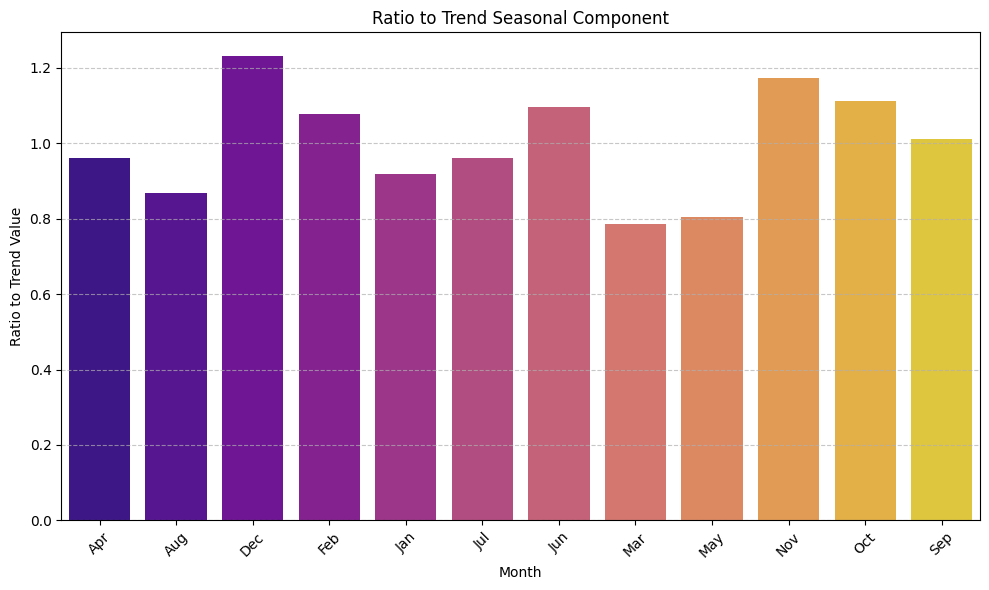

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_component__ration_to_trend.index, y=seasonal_component__ration_to_trend.values, palette='plasma')
plt.title('Ratio to Trend Seasonal Component')
plt.xlabel('Month')
plt.ylabel('Ratio to Trend Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This bar plot visualizes the 'Ratio to Trend Seasonal Component'. Values above 1 indicate months where sales are typically higher than the estimated trend, while values below 1 suggest sales are generally lower than the trend. This helps identify the multiplicative seasonal impact on sales.

### Moving average  ( 12-month centered )


In [8]:
df["Moving_Avg"] = df["Sales"].rolling(window=12, center=True).mean()

# Drop rows with NaN moving averages
df = df.dropna(subset=["Moving_Avg"])

#Ration to moving average
df["Ratio_to_MA"] = df["Sales"] / df["Moving_Avg"]

# Seasonal component ( average ratio by month)
seasonal_component_ratio_to_ma = df.groupby("month")["Ratio_to_MA"].mean()

print("Ratio to Moving Average Seasonal Component : ")
print(seasonal_component_ratio_to_ma)

Ratio to Moving Average Seasonal Component : 
month
Apr    0.947368
Aug    0.868966
Dec    1.297297
Feb    1.040000
Jan    0.885906
Jul    0.963038
Jun    1.090909
Mar    0.754967
May    0.784314
Nov    1.220339
Oct    1.146758
Sep    1.027397
Name: Ratio_to_MA, dtype: float64


/tmp/ipython-input-1157818003.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_component_ratio_to_ma.index, y=seasonal_component_ratio_to_ma.values, palette='viridis')


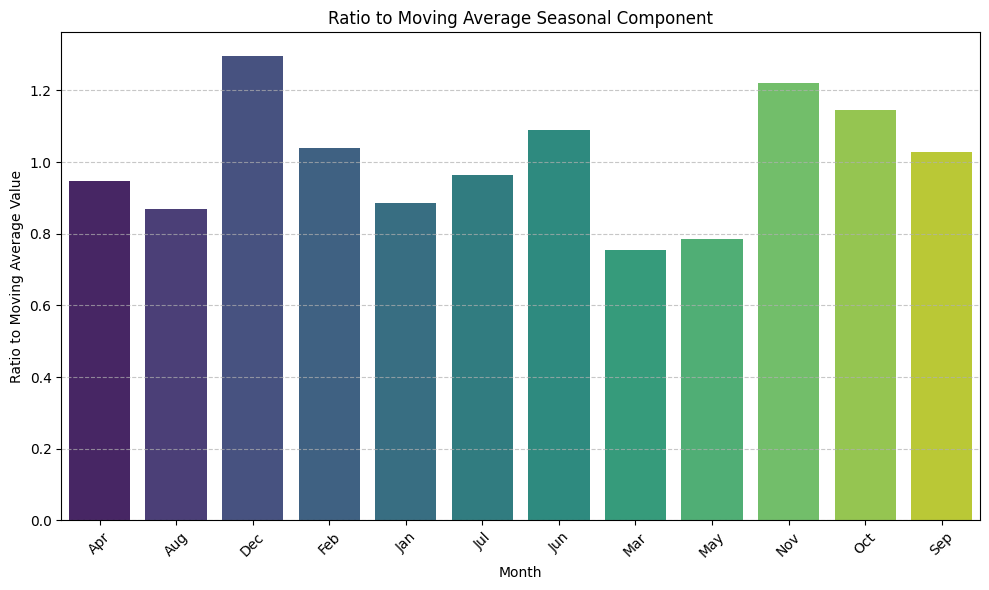

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_component_ratio_to_ma.index, y=seasonal_component_ratio_to_ma.values, palette='viridis')
plt.title('Ratio to Moving Average Seasonal Component')
plt.xlabel('Month')
plt.ylabel('Ratio to Moving Average Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This bar plot visualizes the 'Ratio to Moving Average Seasonal Component'. Values above 1 indicate months where sales are typically higher than the 12-month centered moving average, while values below 1 suggest sales are generally lower. This helps in identifying the multiplicative seasonal patterns after accounting for the trend.

### Compute link relatives


In [10]:
df["Link_Relative"] = df["Sales"].pct_change() * 100

#Group by months and calculate average link relative
seasonal_component_link_relatives = df.groupby("month")["Link_Relative"].mean()

print("Link Relative Seasonal Component :")
print(seasonal_component_link_relatives)




Link Relative Seasonal Component :
month
Apr    26.315789
Aug    -8.695652
Dec     6.666667
Feb    18.181818
Jan   -31.250000
Jul   -10.714286
Jun    40.000000
Mar   -26.923077
May   -16.666667
Nov     7.142857
Oct    12.000000
Sep    19.047619
Name: Link_Relative, dtype: float64


/tmp/ipython-input-2633289271.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_component_link_relatives.index, y=seasonal_component_link_relatives.values, palette='coolwarm')


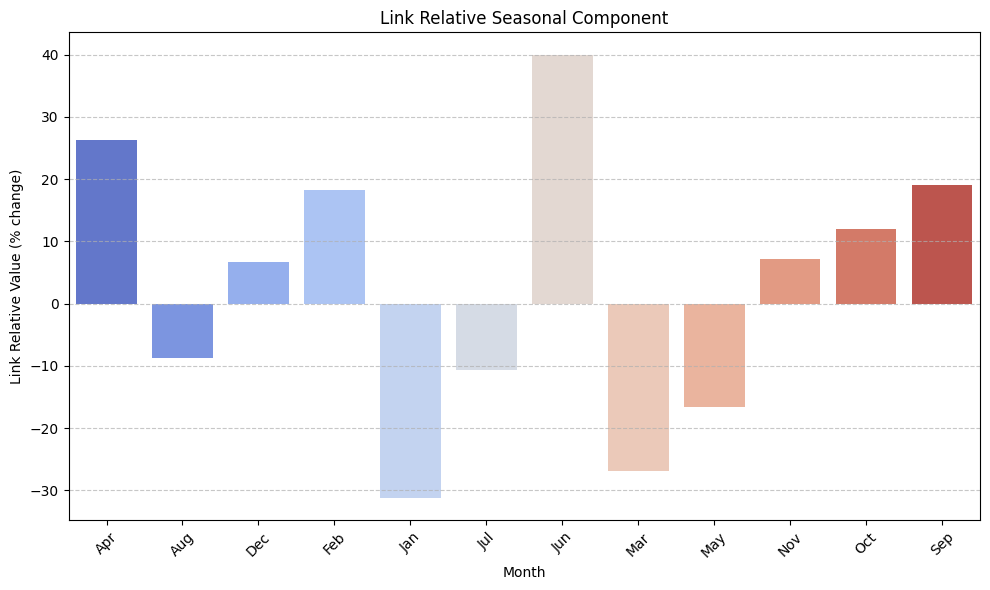

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_component_link_relatives.index, y=seasonal_component_link_relatives.values, palette='coolwarm')
plt.title('Link Relative Seasonal Component')
plt.xlabel('Month')
plt.ylabel('Link Relative Value (% change)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This bar plot visualizes the 'Link Relative Seasonal Component'. Positive values indicate an average increase in sales from the previous period for that month, while negative values indicate an average decrease. This method highlights the month-over-month percentage change in sales, revealing specific seasonal accelerations or decelerations.

Output


Simple Averages Method: Seasonal components directly subtracted from the overall average.

---


Ratio to Trend Method: Seasonal components as ratios to the estimated trend.

---


Ratio to Moving Average Method: Seasonal components as ratios to a centered moving average.

---


Link Relatives Method: Seasonal components as percentage changes relative to previous periods.